# Week 2 - Scale Space and Blob Detection

In [71]:
import os
import cv2
import numpy as np
import skimage.io
from scipy.ndimage import convolve, convolve1d
import matplotlib.pyplot as plt

## Ex 2.1

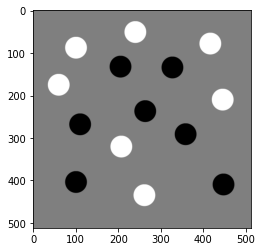

In [97]:
cv2_test_blob_img = cv2.imread(os.path.join('data', 'test_blob_uniform.png'))
plt.imshow(cv2_test_blob_img)

/opt/homebrew/Caskroom/miniconda/base/envs/theorg/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


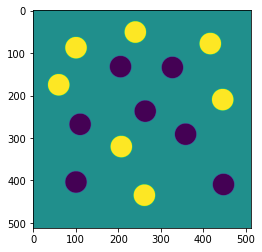

In [75]:
test_blob_img = skimage.io.imread(os.path.join('data', 'test_blob_uniform.png')).astype(np.float)
plt.imshow(test_blob_img)

### 2.1.1 Computing Gaussian and its second order derivate

In [86]:
def gauss_kernels(t):
    x = np.arange(-t,t+1)
    x = x.reshape(x.shape + (1,))
    g = np.exp(-x**2/(2*t))
    g /= np.sum(g)
    dg = -x/(t)*g
    ddg = -1/(t)*g -x/(t)*dg
    return g, dg, ddg

In [87]:
t = 5
v = int(3*np.sqrt(t))
x = np.arange(-v,v+1)
x = x.reshape(x.shape + (1,))
x

array([[-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6]])

In [88]:
g, dg, ddg = gauss_kernels(t)

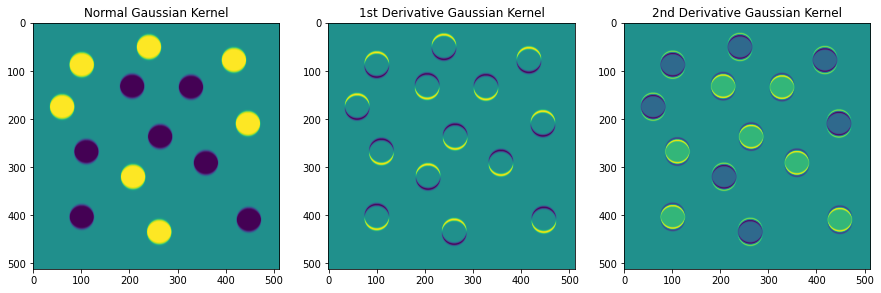

In [102]:
g_convolved_img = convolve(test_blob_img, g)
dg_convolved_img = convolve(test_blob_img, dg)
ddg_convolved_img = convolve(test_blob_img, ddg)

fig, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].set_title('Normal Gaussian Kernel')
ax[0].imshow(g_convolved_img)
ax[1].set_title('1st Derivative Gaussian Kernel')
ax[1].imshow(dg_convolved_img)
ax[2].set_title('2nd Derivative Gaussian Kernel')
ax[2].imshow(ddg_convolved_img)

plt.show()
